El «valor en riesgo» («VaR») es una medida del riesgo de una determinada acción, consistente en determinar la pérdida que se podría sufrir en condiciones normales de mercado en un intervalo de tiempo y con un cierto nivel de probabilidad o de confianza.

In [8]:
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np

Error fetching data for MSFT: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.


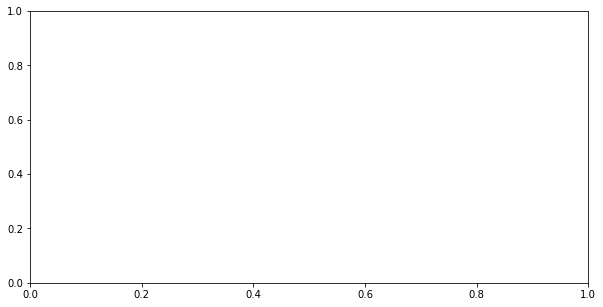

In [12]:
# Define the ticker symbol
ticker_symbol = 'MSFT'

# Get the data for the stock
try:
    ticker = yf.Ticker(ticker_symbol)
    historical_data = ticker.history(period='1y')
    
    if historical_data.empty:
        raise ValueError(f"No data found for ticker symbol: {ticker_symbol}")

    # Plot the closing prices
    plt.figure(figsize=(10, 5))
    plt.plot(historical_data.index, historical_data['Close'], label='Close Price')
    plt.title(f'Closing Prices of {ticker_symbol} for the Last Year')
    plt.xlabel('Date')
    plt.ylabel('Closing Price (USD)')
    plt.legend()
    plt.grid(True)
    plt.show()

except Exception as e:
    print(f"Error fetching data for {ticker_symbol}: {e}")

In [15]:
tesla=yf.Ticker("TSLA")
df=tesla.history(start="2023-12-12",interval="1d")
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-12-12 00:00:00-05:00,238.550003,238.990005,233.869995,237.009995,95328300,0.0,0.0
2023-12-13 00:00:00-05:00,234.190002,240.300003,228.199997,239.289993,146286300,0.0,0.0
2023-12-14 00:00:00-05:00,241.220001,253.880005,240.789993,251.050003,160829200,0.0,0.0
2023-12-15 00:00:00-05:00,251.210007,254.130005,248.300003,253.500000,135720800,0.0,0.0
2023-12-18 00:00:00-05:00,253.779999,258.739990,251.360001,252.080002,116416500,0.0,0.0


In [16]:
df["Close"].head()

Date
2023-12-12 00:00:00-05:00    237.009995
2023-12-13 00:00:00-05:00    239.289993
2023-12-14 00:00:00-05:00    251.050003
2023-12-15 00:00:00-05:00    253.500000
2023-12-18 00:00:00-05:00    252.080002
Name: Close, dtype: float64

In [17]:
tesla_cierre=df["Close"]

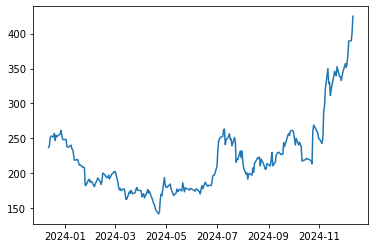

In [18]:
plt.plot(tesla_cierre)

Para calcular el «VaR» necesitamos contar con una distribución de probabilidad, es necesario transformar los datos.

Necesitaremos convertir la serie de no estacionaria (lo cual ya se aprecia facilmente en la gráfica, al verse una tendencia clara en la misma) en estacionaria (con media y varianza constantes). Algunos de los procedimientos para la realización de dicha transformación son el uso de logaritmos o calcular para cada valor, la diferencia entre dicho valor y su correspondiente valor anterior lageado «n» veces. En nuestro caso vamos a hacer uso conjunto de ambas técnicas usando un retardo (o «lag») de 1 (lo que significa que para el cálculo de las diferencias, restaremos a cada valor su correspondiente valor anterior.

In [19]:
#Cálculo de retornos
tesla_retornos=np.log(tesla_cierre)-np.log(tesla_cierre.shift(1))
tesla_ret=tesla_retornos.dropna() #elimina posiblesdatos vacios

In [20]:
tesla_ret.head()

Date
2023-12-13 00:00:00-05:00    0.009574
2023-12-14 00:00:00-05:00    0.047976
2023-12-15 00:00:00-05:00    0.009712
2023-12-18 00:00:00-05:00   -0.005617
2023-12-19 00:00:00-05:00    0.020185
Name: Close, dtype: float64

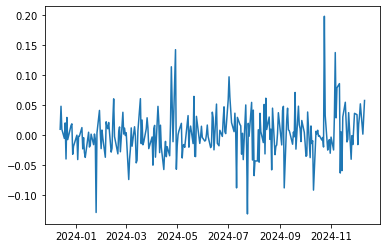

In [21]:
plt.plot(tesla_ret)

Con la serie de datos estacionales calculamops el VaR. Para ello, necesitábamos definir un intervalo (un año), un intervalo de confianza (95%)y una inversión inicial (1500):

In [22]:
#Calcular VaR para una inversion inicial
inv_inicial=1500

#intervalo de confianza
percent=5
var_95=np.percentile(tesla_ret,percent)
print(var_95)

-0.048363758313009875


In [23]:
print(var_95*inv_inicial)

-72.54563746951482


Existe 95% de probabilidades de que la pérdida no supere esta cantidad en un año.

In [26]:
#valor en riesgo condicional
cvar_95=tesla_ret[tesla_ret <= var_95].mean()
print(cvar_95)

-0.07825161023586381
